## Реализация паттерна "Абстрактная фабрика"

Вам даны шесть классов: EasyMap, EasyObjects, MediumMap, MediumObjects, HardMap, HardObjects. Каждый из классов генерирует карту и список объектов для неё.

На их основе Вам необходимо создать абстрактную фабрику AbstractLevel c классовыми методами get_map() и get_objects(). Её реализации должны носить имена EasyLevel, MediumLevel и HardLevel.

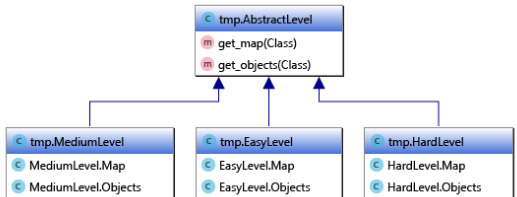

In [ ]:
import random


class EasyMap:

    def __init__(self):
        self._map = [[0 for j in range(5)] for i in range(5)]
        for i in range(5):
            for j in range(5):
                if i == 0 or j == 0 or i == 4 or j == 4:
                    # граница карты
                    self._map[j][i] = -1 
                else:
                    # случайная характеристика области
                    self._map[j][i] = random.randint(0, 2)

    def get_map(self):
        return self._map


class EasyObjects:

    def __init__(self):
        # размещаем переход на след. уровень
        self.objects = [('next_lvl', (2, 2))]

    def get_objects(self, map_obj):
        # размещаем противников
        for obj_name in ['rat']:
            coord = (random.randint(1, 3), random.randint(1, 3))
            # ищем случайную свободную локацию
            intersect = True
            while intersect:
                intersect = False
                for obj in self.objects:
                    if coord == obj[1]:
                        intersect = True
                        coord = (random.randint(1, 3), random.randint(1, 3))

            self.objects.append((obj_name, coord))

        return self.objects


class MediumMap:

    def __init__(self):
        self._map = [[0 for j in range(8)] for i in range(8)]
        for i in range(8):
            for j in range(8):
                if i == 0 or j == 0 or i == 7 or j == 7:
                    # граница карты
                    self._map[j][i] = -1  
                else:
                    # случайная характеристика области
                    self._map[j][i] = random.randint(0, 2)

    def get_map(self):
        return self._map


class MediumObjects:

    def __init__(self):
        # размещаем переход на след. уровень
        self.objects = [('next_lvl', (4, 4))]

    def get_objects(self, map_obj):
        # размещаем врагов
        for obj_name in ['rat', 'snake']:
            coord = (random.randint(1, 6), random.randint(1, 6))
            # ищем случайную свободную локацию
            intersect = True
            while intersect:
                intersect = False
                for obj in self.objects:
                    if coord == obj[1]:
                        intersect = True
                        coord = (random.randint(1, 6), random.randint(1, 6))

            self.objects.append((obj_name, coord))

        return self.objects


class HardMap:

    def __init__(self):
        self._map = [[0 for j in range(10)] for i in range(10)]
        for i in range(10):
            for j in range(10):
                if i == 0 or j == 0 or i == 9 or j == 9:
                    # граница карты
                    self._map[j][i] = -1
                else:
                    # характеристика области (-1 для непроходимой обл.)
                    self._map[j][i] = random.randint(-1, 8)

    def get_map(self):
        return self._map


class HardObjects:

    def __init__(self):
        # размещаем переход на след. уровень
        self.objects = [('next_lvl', (5, 5))]

    def get_objects(self, map_obj):
        # размещаем врагов
        for obj_name in ['rat', 'snake']:
            coord = (random.randint(1, 8), random.randint(1, 8))
            # ищем случайную свободную локацию
            intersect = True
            while intersect:
                intersect = False
                if map_obj[coord[0]][coord[1]] == -1:
                    intersect = True
                    coord = (random.randint(1, 8), random.randint(1, 8))
                    continue
                for obj in self.objects:
                    if coord == obj[1]:
                        intersect = True
                        coord = (random.randint(1, 8), random.randint(1, 8))

            self.objects.append((obj_name, coord))

        return self.objects

### Решение

In [1]:
import random

class AbstractLevel:
    @classmethod
    def get_map(Class):
        return Class.Map()
    
    @classmethod
    def get_objects(Class):
        return Class.Objects()
    
    
class EasyLevel(AbstractLevel):
    class Map:
        def __init__(self):
            self._map = [[0 for j in range(5)] for i in range(5)]
            for i in range(5):
                for j in range(5):
                    if i == 0 or j == 0 or i == 4 or j == 4:
                        # граница карты
                        self._map[j][i] = -1 
                    else:
                        # случайная характеристика области
                        self._map[j][i] = random.randint(0, 2)

        def get_map(self):
            return self._map
        
    class Objects:
        def __init__(self):
            # размещаем переход на след. уровень
            self.objects = [('next_lvl', (2, 2))]

        def get_objects(self, map_obj):
            # размещаем противников
            for obj_name in ['rat']:
                coord = (random.randint(1, 3), random.randint(1, 3))
                # ищем случайную свободную локацию
                intersect = True
                while intersect:
                    intersect = False
                    for obj in self.objects:
                        if coord == obj[1]:
                            intersect = True
                            coord = (random.randint(1, 3), random.randint(1, 3))

                self.objects.append((obj_name, coord))

            return self.objects
        
        
class MediumLevel(AbstractLevel):
    class Map:
        def __init__(self):
            self._map = [[0 for j in range(8)] for i in range(8)]
            for i in range(8):
                for j in range(8):
                    if i == 0 or j == 0 or i == 7 or j == 7:
                        # граница карты
                        self._map[j][i] = -1  
                    else:
                        # случайная характеристика области
                        self._map[j][i] = random.randint(0, 2)

        def get_map(self):
            return self._map
        
    class Objects:
        def __init__(self):
            # размещаем переход на след. уровень
            self.objects = [('next_lvl', (4, 4))]

        def get_objects(self, map_obj):
            # размещаем врагов
            for obj_name in ['rat', 'snake']:
                coord = (random.randint(1, 6), random.randint(1, 6))
                # ищем случайную свободную локацию
                intersect = True
                while intersect:
                    intersect = False
                    for obj in self.objects:
                        if coord == obj[1]:
                            intersect = True
                            coord = (random.randint(1, 6), random.randint(1, 6))

                self.objects.append((obj_name, coord))

            return self.objects
        
        
class HardLevel(AbstractLevel):
    class Map:
        def __init__(self):
            self._map = [[0 for j in range(10)] for i in range(10)]
            for i in range(10):
                for j in range(10):
                    if i == 0 or j == 0 or i == 9 or j == 9:
                        # граница карты
                        self._map[j][i] = -1
                    else:
                        # характеристика области (-1 для непроходимой обл.)
                        self._map[j][i] = random.randint(-1, 8)

        def get_map(self):
            return self._map
        
    class Objects:
        def __init__(self):
            # размещаем переход на след. уровень
            self.objects = [('next_lvl', (5, 5))]

        def get_objects(self, map_obj):
            # размещаем врагов
            for obj_name in ['rat', 'snake']:
                coord = (random.randint(1, 8), random.randint(1, 8))
                # ищем случайную свободную локацию
                intersect = True
                while intersect:
                    intersect = False
                    if map_obj[coord[0]][coord[1]] == -1:
                        intersect = True
                        coord = (random.randint(1, 8), random.randint(1, 8))
                        continue
                    for obj in self.objects:
                        if coord == obj[1]:
                            intersect = True
                            coord = (random.randint(1, 8), random.randint(1, 8))

                self.objects.append((obj_name, coord))

            return self.objects